In [785]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


<h1>Exploratory Data Analysis / Data Preprocessing</h1>

In [786]:
X_train=pd.read_csv('Train.csv', usecols=['Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats'])
Y_train=pd.read_csv('Train.csv', usecols=['Price'])
X=pd.read_csv('Train.csv')

In [787]:
print(X_train.shape)
print(Y_train.shape)

(3750, 9)
(3750, 1)


In [788]:
X.isna().sum()

Unnamed: 0            0
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               1
Engine               28
Power                28
Seats                32
Price                 0
dtype: int64

In [789]:
print("Overview of X_train input:\n\n", X_train.head(5).to_string())
print("\nOverview of Y_train input:\n\n", Y_train.head(5))

Overview of X_train input:

    Year  Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage   Engine       Power  Seats
0  2017              16500    Petrol       Manual      First  23.84 kmpl  1199 CC      84 bhp    5.0
1  2017              47357    Diesel    Automatic      First  18.49 kmpl  1493 CC     100 bhp    7.0
2  2014              35000    Petrol       Manual      First   15.0 kmpl  1598 CC  103.52 bhp    5.0
3  2007             200000    Diesel       Manual     Second   17.2 kmpl  1396 CC    53.5 bhp    5.0
4  2013              64000    Diesel       Manual     Second  21.02 kmpl  1248 CC   88.76 bhp    5.0

Overview of Y_train input:

    Price
0   5.00
1   8.37
2   4.50
3   0.85
4   2.65


In [790]:
def preprocessing(X_train):
    X_train['Engine'] = X_train['Engine'].str.replace('CC', '')
    X_train['Mileage'] = X_train['Mileage'].str.replace('kmpl', '')
    X_train['Power'] = X_train['Power'].str.replace('bhp', '')
    X_train['Engine'] = X_train['Engine'].astype(float)
    X_train['Mileage'] = X_train['Mileage'].astype(float)
    X_train['Power'] = pd.to_numeric(X_train['Power'],errors='coerce')
    X_train['Mileage']=X_train['Mileage'].fillna(X_train['Mileage'].mean())
    X_train['Engine']=X_train['Engine'].fillna(X_train['Engine'].mean())
    X_train['Seats']=X_train['Seats'].fillna(X_train['Seats'].mean())
    X_train['Power']=X_train['Power'].fillna(X_train['Power'].mean())
    owner_mapping = {
        'First': 1,
        'Second': 2,
        'Third': 3,
        'Fourth & Above': 4
    }    
    X_train['Owner_Type'] = X_train['Owner_Type'].map(owner_mapping)
    return pd.get_dummies(X_train, columns=['Fuel_Type', 'Transmission'], drop_first=True)

def normx(X):
    X_norm = X.copy()
    for col in X.columns:
        if set(X[col].unique()) == {0} or set(X[col].unique()) == {0, 1}:
            continue  # Skip binary columns (or columns with zero variance)
        mean = X[col].mean()
        std = X[col].std()
        X_norm[col] = (X[col] - mean) / std
    return X_norm

def normy(Y):
    return (Y-Ymean)/Ystd



In [791]:
X_train = preprocessing(X_train)
X=preprocessing(X)

In [792]:
X_train[X_train['Fuel_Type_Electric']==True]

Year  Kilometers_Driven  Owner_Type    Mileage  Engine  Power  Seats  \
330  2016              50000           1  18.041376    72.0   41.0    5.0   

     Fuel_Type_Electric  Fuel_Type_Petrol  Transmission_Manual  
330                True             False                False

In [793]:
print("\nDetailed analysis of X_train input:\n\n", X_train.describe().to_string())
print("\nDetailed analysis of X_train input:\n\n", Y_train.describe().to_string())


Detailed analysis of X_train input:

               Year  Kilometers_Driven  Owner_Type      Mileage       Engine        Power        Seats
count  3750.000000        3750.000000  3750.00000  3750.000000  3750.000000  3750.000000  3750.000000
mean   2013.313333       58128.811733     1.20000    18.041376  1621.910532   113.589670     5.277838
std       3.264250       40343.978048     0.45496     4.522298   599.457483    53.515557     0.802768
min    1998.000000        1000.000000     1.00000     0.000000    72.000000    34.200000     2.000000
25%    2011.000000       34000.000000     1.00000    15.260000  1198.000000    78.000000     5.000000
50%    2014.000000       53000.000000     1.00000    18.000000  1495.000000    98.600000     5.000000
75%    2016.000000       73157.750000     1.00000    20.890000  1984.000000   138.067500     5.000000
max    2019.000000      775000.000000     4.00000    28.400000  5461.000000   550.000000    10.000000

Detailed analysis of X_train input:

     

<h2>Outlier Detection</h2>

In [794]:
#Since there is only one EV, we can remove this column.
X_train['Fuel_Type_Electric'].value_counts()

Fuel_Type_Electric
False    3749
True        1
Name: count, dtype: int64

In [795]:
#X_train = X_train.drop(columns=['Fuel_Type_Electric'])

In [796]:
print("Stange phenomenon observed as it is not possible for a working car to have a mileage of zero.\n")
print("Number of datapoints where car has zero mileage:",(X['Mileage'] == 0).sum())
X_train[X_train['Mileage'] == 0].head() #Strange.

Stange phenomenon observed as it is not possible for a working car to have a mileage of zero.

Number of datapoints where car has zero mileage: 46


Year  Kilometers_Driven  Owner_Type  Mileage       Engine      Power  \
74   2005             120000           1      0.0  1086.000000  113.58967   
130  2003              75000           2      0.0  1621.910532  113.58967   
148  2019              15369           1      0.0  1950.000000  194.00000   
239  2008              55001           2      0.0  1621.910532  113.58967   
260  2015              20000           1      0.0  2987.000000  165.00000   

        Seats  Fuel_Type_Electric  Fuel_Type_Petrol  Transmission_Manual  
74   5.000000               False              True                 True  
130  5.277838               False             False                False  
148  5.000000               False             False                False  
239  5.277838               False             False                False  
260  5.000000               False             False                False

In [797]:
mileage_mask = X_train['Mileage'] != 0
X_train = X_train[mileage_mask].reset_index(drop=True)
Y_train = Y_train[mileage_mask].reset_index(drop=True)

In [798]:
#We can clearly see that the model with 72cc is an outlier. But it is also the only electric car in the database and if i remove it, the Fuel_electric column becomes meaningless and my r2 score takes a massive hit.
print(X_train.sort_values(by='Engine', ascending=True))

      Year  Kilometers_Driven  Owner_Type    Mileage  Engine   Power  Seats  \
325   2016              50000           1  18.041376    72.0   41.00    5.0   
131   2014              19698           1  25.400000   624.0   37.50    4.0   
3559  2016               5240           1  21.900000   624.0   37.48    4.0   
622   2014              25500           1  25.400000   624.0   37.50    4.0   
1005  2017              14149           1  23.900000   624.0   37.48    4.0   
...    ...                ...         ...        ...     ...     ...    ...   
3334  2008              73000           1   8.500000  4806.0  500.00    5.0   
819   2010              42400           3   8.000000  4806.0  394.30    4.0   
2164  2018              21290           1  13.000000  4951.0  395.00    4.0   
2568  2014               3000           2  12.000000  5461.0  421.00    2.0   
3296  2010              35000           1   8.100000  5461.0  387.30    2.0   

      Fuel_Type_Electric  Fuel_Type_Petrol  Transmi

In [799]:
#Since there are only 13 cars which have cc of over 4.3k, they are outliers.
print((X_train[X_train['Engine']>4300]))

      Year  Kilometers_Driven  Owner_Type  Mileage  Engine  Power  Seats  \
679   2011               5900           1     7.94  4395.0  450.0    4.0   
819   2010              42400           3     8.00  4806.0  394.3    4.0   
1030  2010              50161           1     8.77  4395.0  402.0    5.0   
2120  2010              35000           2    11.90  4806.0  550.0    5.0   
2164  2018              21290           1    13.00  4951.0  395.0    4.0   
2568  2014               3000           2    12.00  5461.0  421.0    2.0   
2903  2012              84384           1    10.20  4367.0  308.0    7.0   
3296  2010              35000           1     8.10  5461.0  387.3    2.0   
3334  2008              73000           1     8.50  4806.0  500.0    5.0   
3433  2011              55000           1    10.20  4367.0  308.0    7.0   
3516  2010              65329           1     7.94  4395.0  450.0    4.0   
3557  2012              66538           1    10.20  4367.0  308.0    7.0   
3672  2012  

In [800]:
engine_mask = (X_train['Engine'] <= 4300) & (X_train['Engine'] >100)
X_train = X_train[engine_mask].reset_index(drop=True)
Y_train = Y_train[engine_mask].reset_index(drop=True)

In [801]:
print("\nDetailed analysis of X_train input:\n\n", X_train.describe().to_string())
print("\nDetailed analysis of X_train input:\n\n", Y_train.describe().to_string())


Detailed analysis of X_train input:

               Year  Kilometers_Driven   Owner_Type      Mileage       Engine        Power        Seats
count  3690.000000        3690.000000  3690.000000  3690.000000  3690.000000  3690.000000  3690.000000
mean   2013.368835       58026.015989     1.197290    18.295089  1611.270789   112.495943     5.283575
std       3.219494       40413.446426     0.451609     4.051498   569.535583    50.765396     0.800692
min    1998.000000        1000.000000     1.000000     8.300000   624.000000    34.200000     2.000000
25%    2011.000000       34000.000000     1.000000    15.400000  1198.000000    78.000000     5.000000
50%    2014.000000       53000.000000     1.000000    18.160000  1493.000000    98.600000     5.000000
75%    2016.000000       73063.000000     1.000000    21.020000  1968.000000   138.030000     5.000000
max    2019.000000      775000.000000     4.000000    28.400000  4134.000000   444.000000    10.000000

Detailed analysis of X_train inpu

In [802]:
power_mask= (X_train['Power'] >= 53.5) & (X_train['Power'] <=400)
X_train = X_train[power_mask].reset_index(drop=True)
Y_train = Y_train[power_mask].reset_index(drop=True)

In [803]:
print(X_train.sort_values(by='Power', ascending=True).head(20))

      Year  Kilometers_Driven  Owner_Type  Mileage  Engine  Power  Seats  \
963   2008              77650           1     17.2  1396.0  53.50    5.0   
3     2007             200000           2     17.2  1396.0  53.50    5.0   
3142  2008              50000           1     17.2  1396.0  53.50    5.0   
3439  2018              30953           1     22.7   799.0  53.64    5.0   
3309  2017              27509           1     22.7   799.0  53.64    5.0   
157   2016              15000           1     22.7   799.0  53.64    5.0   
1942  2016              20487           1     22.7   799.0  53.64    5.0   
256   2016              27886           1     22.0   814.0  55.00    5.0   
2780  2015              55000           1     22.0   814.0  55.00    5.0   
1916  2014              47000           1     22.0   814.0  55.00    5.0   
2702  2015              19000           1     21.1   814.0  55.20    5.0   
759   2013              70000           1     21.1   814.0  55.20    5.0   
2610  2013  

<Axes: >

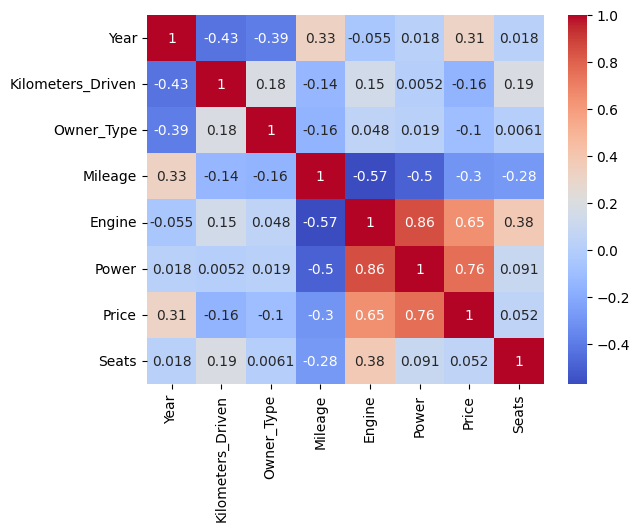

In [804]:
corr = X[['Year','Kilometers_Driven','Owner_Type','Mileage','Engine','Power','Price','Seats']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

<h1>Training</h1>

In [805]:
Xmean = X_train.loc[:, X_train.apply(lambda col: col.nunique() > 2)].mean()
Xstd = X_train.loc[:, X_train.apply(lambda col: col.nunique() > 2)].std()
Ystd=Y_train.std().item()
Ymean=Y_train.mean().item()
X_train = normx(X_train)
Y_train = normy(Y_train)

In [806]:
print(X_train.isna().sum())


Year                   0
Kilometers_Driven      0
Owner_Type             0
Mileage                0
Engine                 0
Power                  0
Seats                  0
Fuel_Type_Electric     0
Fuel_Type_Petrol       0
Transmission_Manual    0
dtype: int64


In [807]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()

In [808]:
W_train = np.ones((X_train.shape[1], 1))
B_train= 0.0

In [809]:
def compute_cost(Y,Yp):
    cost = (Y-Yp)**2/(2*Y.size)
    return cost.sum()

def z_calc(X,W,B):
    return np.matmul(X,W)+B

In [810]:
Z_train=z_calc(X_train,W_train,B_train)
Z_train

array([[1.2764955479293023],
       [2.0644287170931546],
       [-0.2956454006916447],
       ...,
       [-2.848058062106773],
       [0.45777125784613515],
       [-1.6487979987960473]], dtype=object)

In [811]:
print(X_train.shape)
print(Y_train.shape)
print(Z_train.shape)

(3558, 10)
(3558, 1)
(3558, 1)


In [812]:
W_history=[]
B_history=[]
Z_history=[]
J_history=[]
W_history.append(W_train)
B_history.append(B_train)
Z_history.append(Z_train)
J_history.append(compute_cost(Y_train,Z_train))

In [813]:
def gradescent(epoch, alpha, W_history, J_history, B_history, Z_history, X_train, Y_train, Z_train):
    for i in range(epoch):
        W_history.append(W_history[-1]-alpha/X_train.shape[0]*X_train.T@(Z_train-Y_train))
        B_history.append(B_history[-1]-alpha/X_train.shape[0]*np.sum((Z_train-Y_train)))
        Z_train = z_calc(X_train, W_history[-1], B_history[-1])
        Z_history.append(Z_train)
        J_history.append(compute_cost(Y_train,Z_train))
        if (i%10)==0:
            print("Iteration:",i, "Cost:", J_history[-1])

In [814]:
epoch=1000
alpha=.4
gradescent(epoch, alpha, W_history, J_history, B_history, Z_history, X_train, Y_train, Z_train)

Iteration: 0 Cost: 0.9893880752203186
Iteration: 10 Cost: 0.2265083984424373
Iteration: 20 Cost: 0.19504571815077193
Iteration: 30 Cost: 0.1777051808021818
Iteration: 40 Cost: 0.16734925780877244
Iteration: 50 Cost: 0.16106338035996773
Iteration: 60 Cost: 0.1572106754893414
Iteration: 70 Cost: 0.15483472778792606
Iteration: 80 Cost: 0.15336380472820238
Iteration: 90 Cost: 0.15245096248299173
Iteration: 100 Cost: 0.15188360290046976
Iteration: 110 Cost: 0.15153063850274784
Iteration: 120 Cost: 0.15131092347360006
Iteration: 130 Cost: 0.1511741033899372
Iteration: 140 Cost: 0.15108888324950615
Iteration: 150 Cost: 0.15103579475152584
Iteration: 160 Cost: 0.1510027196060865
Iteration: 170 Cost: 0.15098211178404575
Iteration: 180 Cost: 0.1509692712648061
Iteration: 190 Cost: 0.15096127020272723
Iteration: 200 Cost: 0.1509562845310319
Iteration: 210 Cost: 0.15095317776631745
Iteration: 220 Cost: 0.15095124178953748
Iteration: 230 Cost: 0.15095003537115478
Iteration: 240 Cost: 0.150949283573

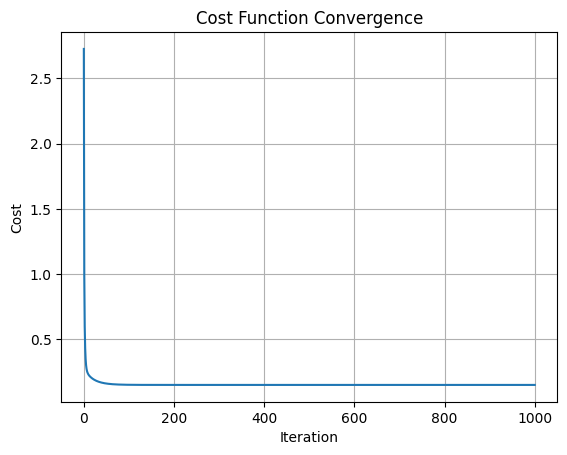

In [815]:
plt.plot(J_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.grid(True)
plt.show()

In [816]:
Y_train=Y_train*Ystd+Ymean
Z_train=Z_history[-1]
Z_train=Z_train*Ystd+Ymean

In [817]:
Z_train.min()

-16.167510543703884

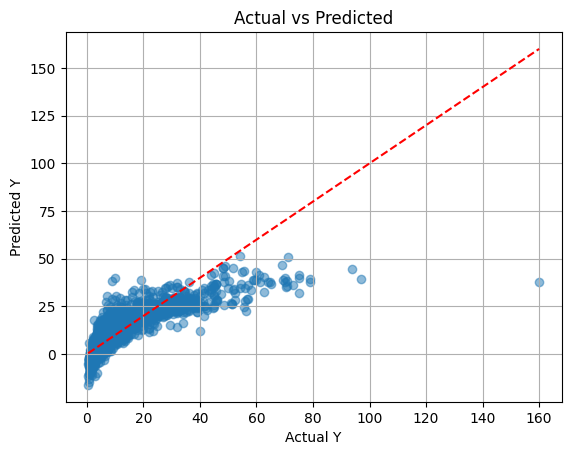

In [818]:
plt.scatter(Y_train, Z_train, alpha=0.5)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--')  # Diagonal
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

In [819]:
ss_res = ((Y_train - Z_train) ** 2).sum()         # Residual sum of squares
ss_tot = ((Y_train - Y_train.mean()) ** 2).sum()  # Total sum of squares

r2 = 1 - ss_res/ss_tot

print("R² score:", r2)

R² score: 0.6980190456936963


In [820]:
W=W_history[-1]
B=B_history[-1]

In [821]:
W.shape

(10, 1)

<h1>Testing Begins Here</h1>

In [822]:
X_test=pd.read_csv('Test.csv', usecols=['Year','Kilometers_Driven','Fuel_Type','Transmission','Owner_Type','Mileage','Engine','Power','Seats'])
Y_test=pd.read_csv('Test.csv', usecols=['Price'])

In [823]:
X_test=preprocessing(X_test)
X_test = normx(X_test)

In [824]:
X_test[X_test['Fuel_Type_Electric']==True]

Year  Kilometers_Driven  Owner_Type  Mileage    Engine     Power  \
281 -0.753903          -0.098527   -0.439169      0.0  0.266126 -0.829004   

        Seats  Fuel_Type_Electric  Fuel_Type_Petrol  Transmission_Manual  
281 -0.363223                True             False                False

In [825]:
#X_test = X_test.drop(columns=['Fuel_Type_Electric'])

In [826]:
X_test=X_test.to_numpy()
Y_test=Y_test.to_numpy()

In [827]:
Y_hat=X_test@W+B
Y_hat = Y_hat*Ystd+Ymean

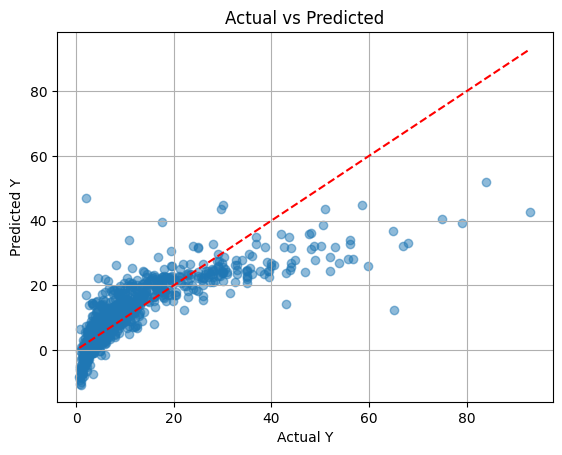

In [828]:
plt.scatter(Y_test, Y_hat, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # Diagonal
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()

In [829]:
ss_res = ((Y_test - Y_hat) ** 2).sum()         # Residual sum of squares
ss_tot = ((Y_test - Y_hat.mean()) ** 2).sum()  # Total sum of squares

r2 = 1 - ss_res/ss_tot

print("R² score:", r2)

R² score: 0.6771829993019707


In [830]:
#R2 score 1 (No outlier removal): 0.5359170687614954
#R2 score 2 (After just adding mileage mask): 0.5467357536866696  
#R2 score 3 (Just engine mask and dropped Fuel_Type_Electric column and no mileage mask): 0.4311169862331051
#R2 score 4 (Mileage mask + Dropped column + Engine mask): 0.44219458559524594
#R2 score 5 (Mileage mask + Dropped column): 0.4297231575559941
#R2 score 6 (Mileage mask + Engine mask without removing the 72cc datapoint so that I don't have to drop the column): 0.5549321408556139
#R2 score 7 (Same as 6 but tweaking the engine mask to get best R2): 0.5554031301729788
#R2 score 8 (Added a power mask too): 0.5692372975661953
#R2 score 9 (Changed normx function): 0.6753593592824518
#R2 score 10 (Finally removed the 72cc anomoly): 0.6753775884824147
#R2 score 11 (Tweaked the power mask to increase r2 score): 0.6771829993019707

In [ ]:
"""To try:
1- Ridge/Lasso regularisation
2- getdummies to get companies
